In [1]:
from time import time

from spineq.data.census import PopulationDataset, WorkplaceDataset
from spineq.data.group import LocalAuthority
from spineq.mappings import lad20nm_to_lad20cd
from spineq.opt.coverage import ExponentialCoverage
from spineq.opt.greedy import Greedy
from spineq.opt.objectives import Column, CombinedObjectives
from spineq.plot.plotting import plot_oa_weights, plot_optimisation_result

/Users/jroberts/opt/anaconda3/envs/spatial-inequality/lib/python3.9/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
lad20nm = "Newcastle upon Tyne"
lad20cd = lad20nm_to_lad20cd(lad20nm)

n_sensors = 20

theta = 500

# plot raw weights or density (weight divided by OA area)
density = True

# colour scale range
vmin = 0
vmax = None if density else 0.01

In [3]:
la = LocalAuthority(lad20cd)
cov = ExponentialCoverage.from_la(la, theta)
greedy = Greedy()

## Total Population Only

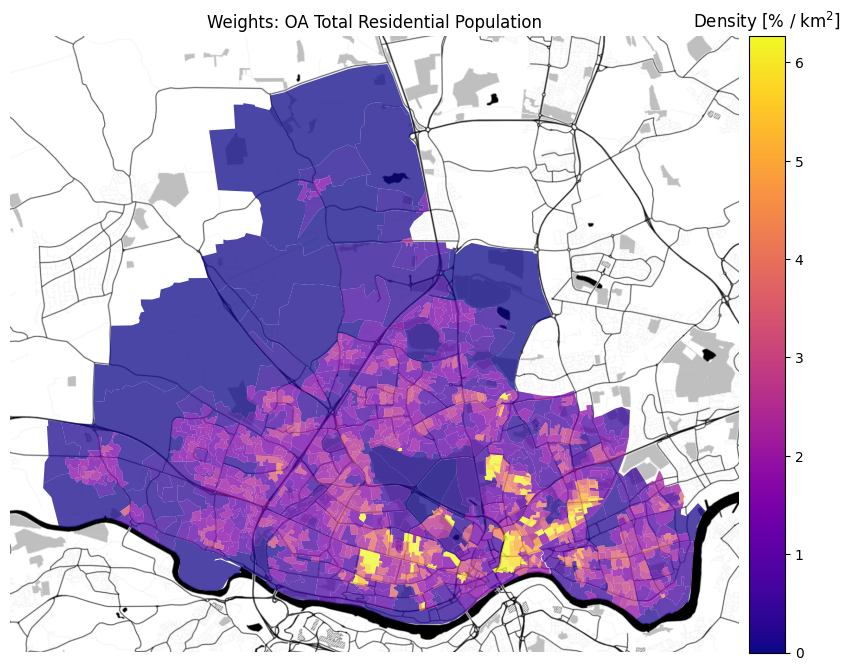

In [4]:
pop = PopulationDataset(lad20cd).to_total()
la.add_dataset(pop)

objs = CombinedObjectives(la, [Column(pop.name, "total")], cov)

plot_oa_weights(
    objs,
    title="Weights: OA Total Residential Population",
    vmin=vmin,
    vmax=vmax,
    density=density,
)

Placing sensor 1 out of 20 ... coverage = 0.04
Placing sensor 2 out of 20 ... coverage = 0.08
Placing sensor 3 out of 20 ... coverage = 0.10
Placing sensor 4 out of 20 ... coverage = 0.13
Placing sensor 5 out of 20 ... coverage = 0.15
Placing sensor 6 out of 20 ... coverage = 0.17
Placing sensor 7 out of 20 ... coverage = 0.19
Placing sensor 8 out of 20 ... coverage = 0.21
Placing sensor 9 out of 20 ... coverage = 0.23
Placing sensor 10 out of 20 ... coverage = 0.24
Placing sensor 11 out of 20 ... coverage = 0.25
Placing sensor 12 out of 20 ... coverage = 0.27
Placing sensor 13 out of 20 ... coverage = 0.28
Placing sensor 14 out of 20 ... coverage = 0.29
Placing sensor 15 out of 20 ... coverage = 0.30
Placing sensor 16 out of 20 ... coverage = 0.31
Placing sensor 17 out of 20 ... coverage = 0.32
Placing sensor 18 out of 20 ... coverage = 0.33
Placing sensor 19 out of 20 ... coverage = 0.34
Placing sensor 20 out of 20 ... coverage = 0.35
Took 50.472935914993286 seconds


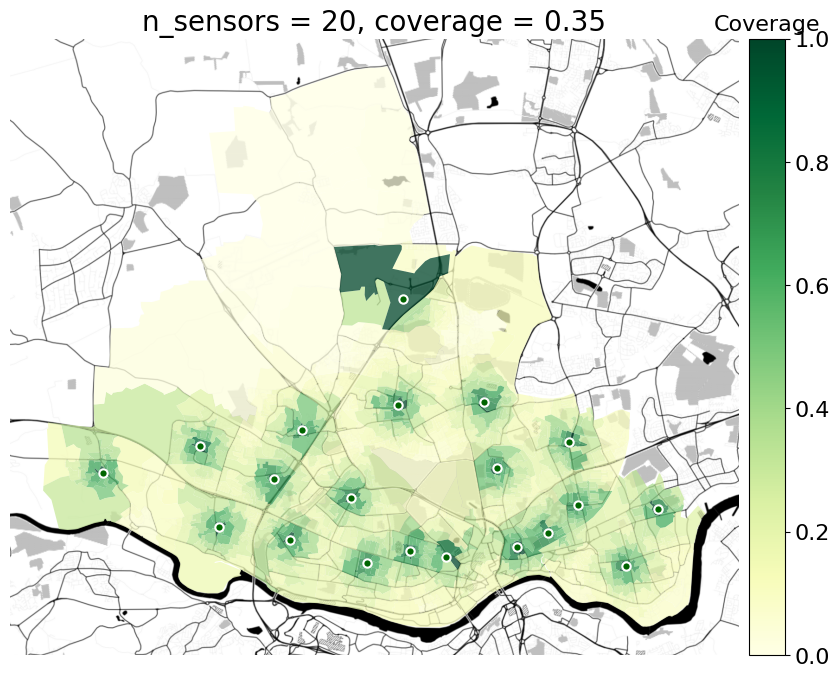

In [5]:
start_time = time()
result = greedy.run(objs, n_sensors)
print("Took", time() - start_time, "seconds")

plot_optimisation_result(result)

## Place of Work Only

NB: Does using population weighted centroid make sense for workplace? Only alternative is to use OA (non-weighted) centroid. More complex for optimisation to use different locations for each one.

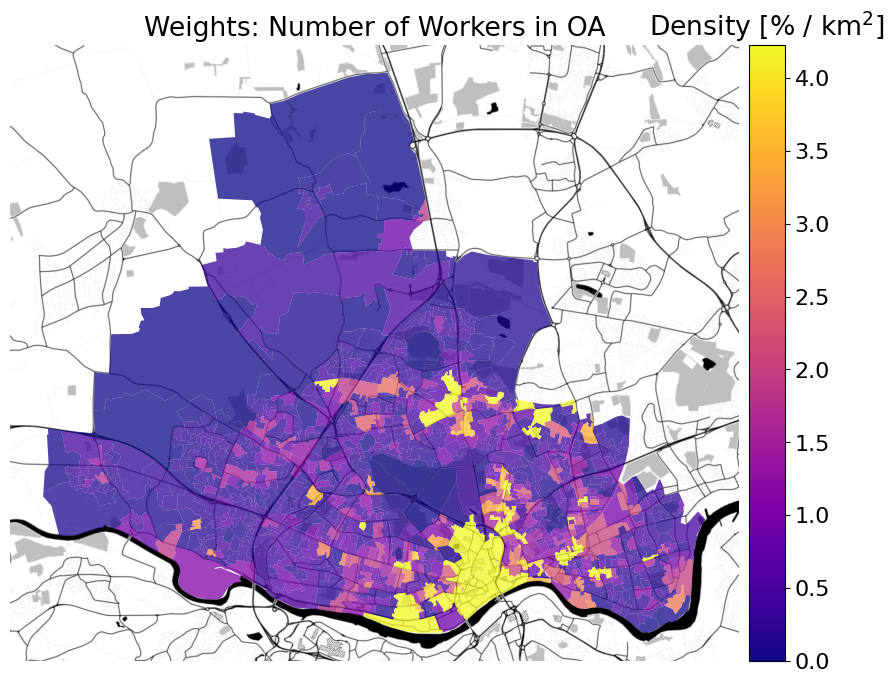

In [6]:
work = WorkplaceDataset(lad20cd)
la.add_dataset(work)
objs = CombinedObjectives(la, [Column(work.name, "workers")], cov)

plot_oa_weights(
    objs,
    title="Weights: Number of Workers in OA",
    vmin=vmin,
    vmax=vmax,
    density=density,
)

Placing sensor 1 out of 20 ... coverage = 0.16
Placing sensor 2 out of 20 ... coverage = 0.22
Placing sensor 3 out of 20 ... coverage = 0.27
Placing sensor 4 out of 20 ... coverage = 0.31
Placing sensor 5 out of 20 ... coverage = 0.35
Placing sensor 6 out of 20 ... coverage = 0.38
Placing sensor 7 out of 20 ... coverage = 0.41
Placing sensor 8 out of 20 ... coverage = 0.43
Placing sensor 9 out of 20 ... coverage = 0.45
Placing sensor 10 out of 20 ... coverage = 0.47
Placing sensor 11 out of 20 ... coverage = 0.48
Placing sensor 12 out of 20 ... coverage = 0.50
Placing sensor 13 out of 20 ... coverage = 0.51
Placing sensor 14 out of 20 ... coverage = 0.52
Placing sensor 15 out of 20 ... coverage = 0.53
Placing sensor 16 out of 20 ... coverage = 0.55
Placing sensor 17 out of 20 ... coverage = 0.56
Placing sensor 18 out of 20 ... coverage = 0.57
Placing sensor 19 out of 20 ... coverage = 0.58
Placing sensor 20 out of 20 ... coverage = 0.59


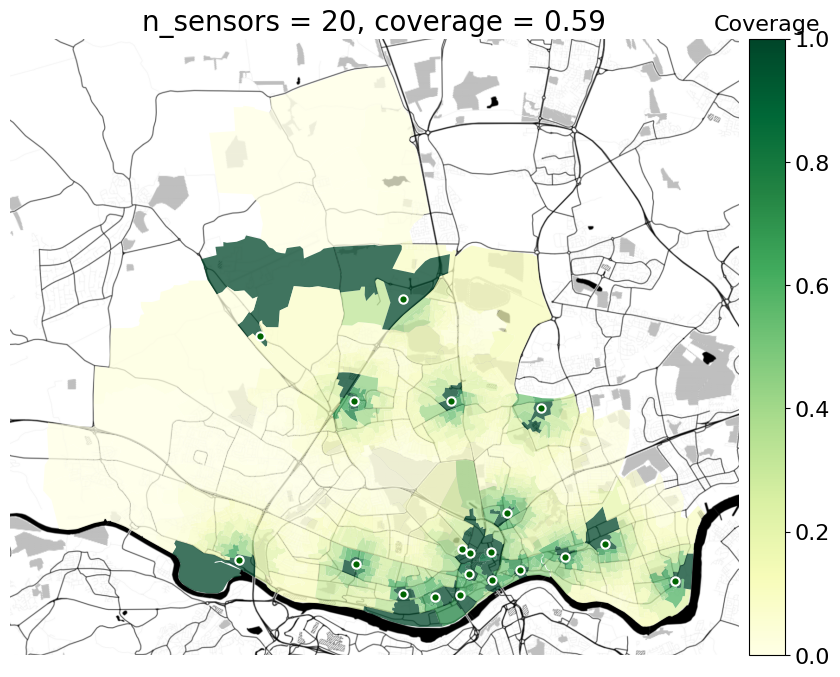

In [7]:
result = greedy.run(objs, n_sensors)

plot_optimisation_result(result)

## Children <16 Years Old Only

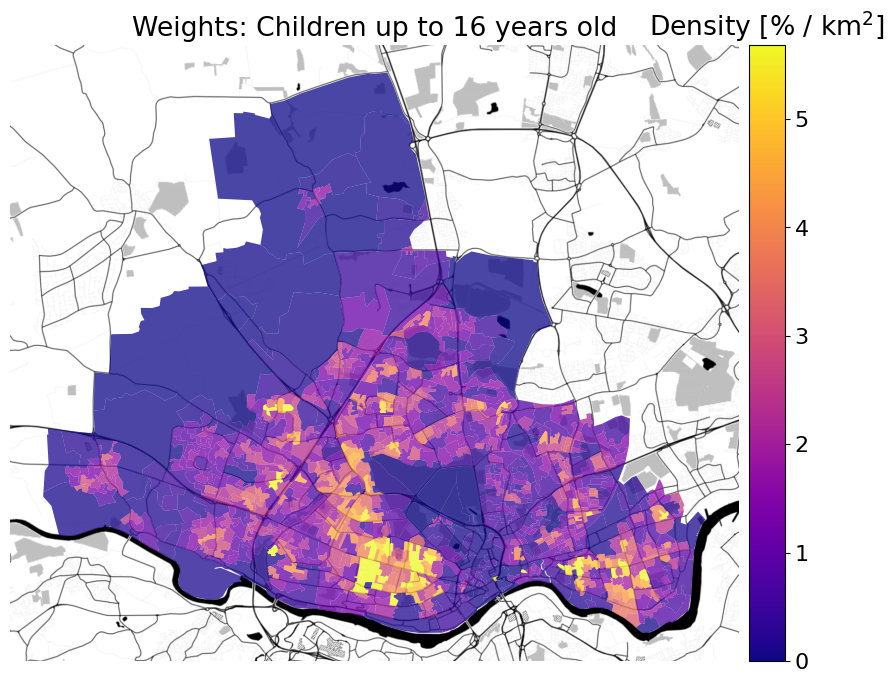

In [8]:
age = 16
child = PopulationDataset(lad20cd).filter_age(high=age, name="Children").to_total()
la.add_dataset(child)

objs = CombinedObjectives(la, [Column(child.name, "total")], cov)


plot_oa_weights(
    objs,
    title=f"Weights: Children up to {age} years old",
    vmin=vmin,
    vmax=vmax,
    density=density,
)

Placing sensor 1 out of 20 ... coverage = 0.06
Placing sensor 2 out of 20 ... coverage = 0.09
Placing sensor 3 out of 20 ... coverage = 0.12
Placing sensor 4 out of 20 ... coverage = 0.14
Placing sensor 5 out of 20 ... coverage = 0.16
Placing sensor 6 out of 20 ... coverage = 0.19
Placing sensor 7 out of 20 ... coverage = 0.21
Placing sensor 8 out of 20 ... coverage = 0.22
Placing sensor 9 out of 20 ... coverage = 0.24
Placing sensor 10 out of 20 ... coverage = 0.25
Placing sensor 11 out of 20 ... coverage = 0.27
Placing sensor 12 out of 20 ... coverage = 0.28
Placing sensor 13 out of 20 ... coverage = 0.29
Placing sensor 14 out of 20 ... coverage = 0.31
Placing sensor 15 out of 20 ... coverage = 0.32
Placing sensor 16 out of 20 ... coverage = 0.33
Placing sensor 17 out of 20 ... coverage = 0.34
Placing sensor 18 out of 20 ... coverage = 0.35
Placing sensor 19 out of 20 ... coverage = 0.36
Placing sensor 20 out of 20 ... coverage = 0.37


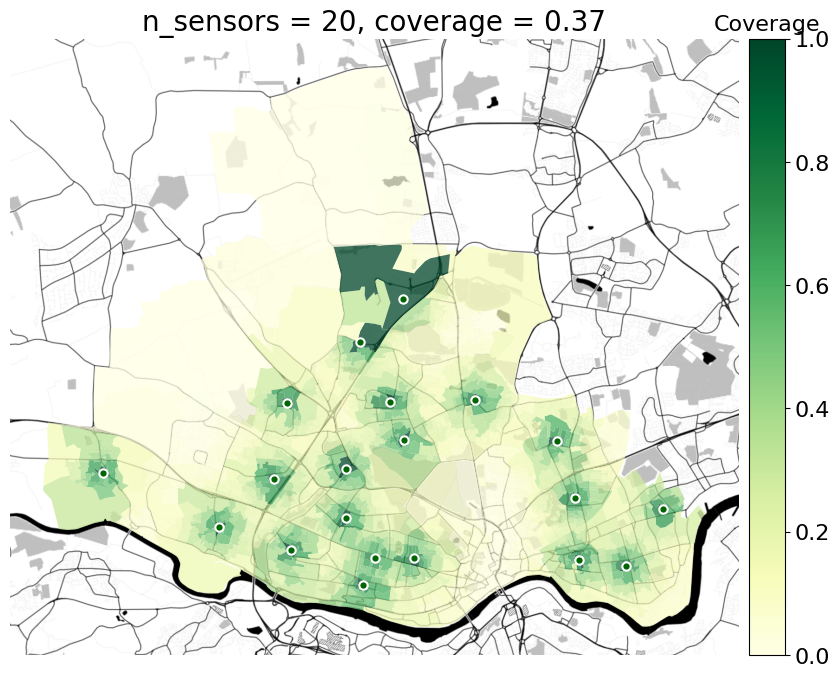

In [9]:
result = greedy.run(objs, n_sensors)
plot_optimisation_result(result)

## Adults >=65 Only

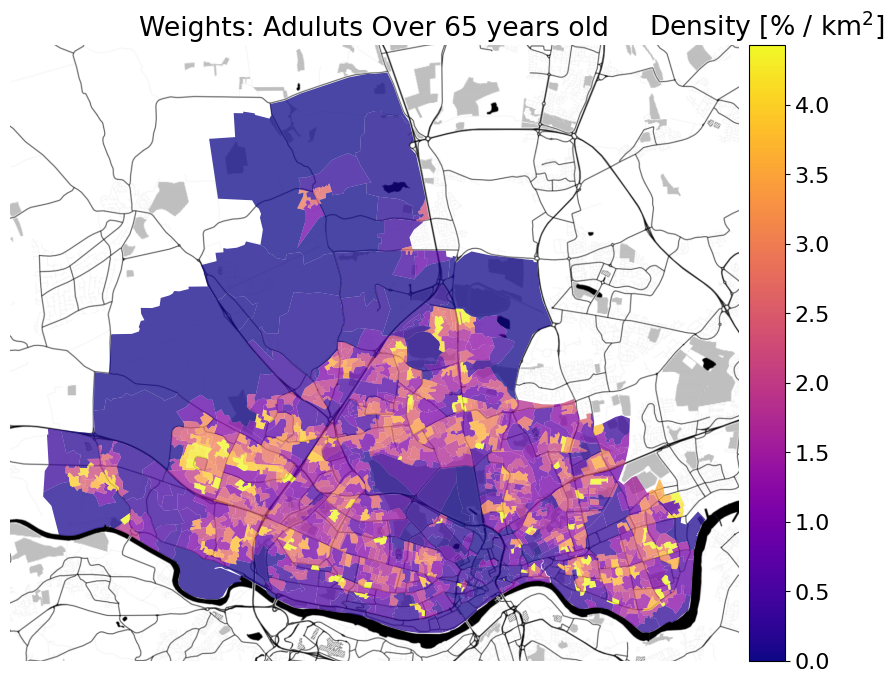

In [10]:
age = 65
over65 = PopulationDataset(lad20cd).filter_age(low=age, name="Over65s").to_total()
la.add_dataset(over65)

objs = CombinedObjectives(la, [Column(over65.name, "total")], cov)

plot_oa_weights(
    objs,
    title=f"Weights: Aduluts Over {age} years old",
    vmin=vmin,
    vmax=vmax,
    density=density,
)

Placing sensor 1 out of 20 ... coverage = 0.03
Placing sensor 2 out of 20 ... coverage = 0.06
Placing sensor 3 out of 20 ... coverage = 0.09
Placing sensor 4 out of 20 ... coverage = 0.11
Placing sensor 5 out of 20 ... coverage = 0.13
Placing sensor 6 out of 20 ... coverage = 0.15
Placing sensor 7 out of 20 ... coverage = 0.17
Placing sensor 8 out of 20 ... coverage = 0.19
Placing sensor 9 out of 20 ... coverage = 0.20
Placing sensor 10 out of 20 ... coverage = 0.22
Placing sensor 11 out of 20 ... coverage = 0.23
Placing sensor 12 out of 20 ... coverage = 0.25
Placing sensor 13 out of 20 ... coverage = 0.26
Placing sensor 14 out of 20 ... coverage = 0.27
Placing sensor 15 out of 20 ... coverage = 0.28
Placing sensor 16 out of 20 ... coverage = 0.29
Placing sensor 17 out of 20 ... coverage = 0.30
Placing sensor 18 out of 20 ... coverage = 0.31
Placing sensor 19 out of 20 ... coverage = 0.32
Placing sensor 20 out of 20 ... coverage = 0.33


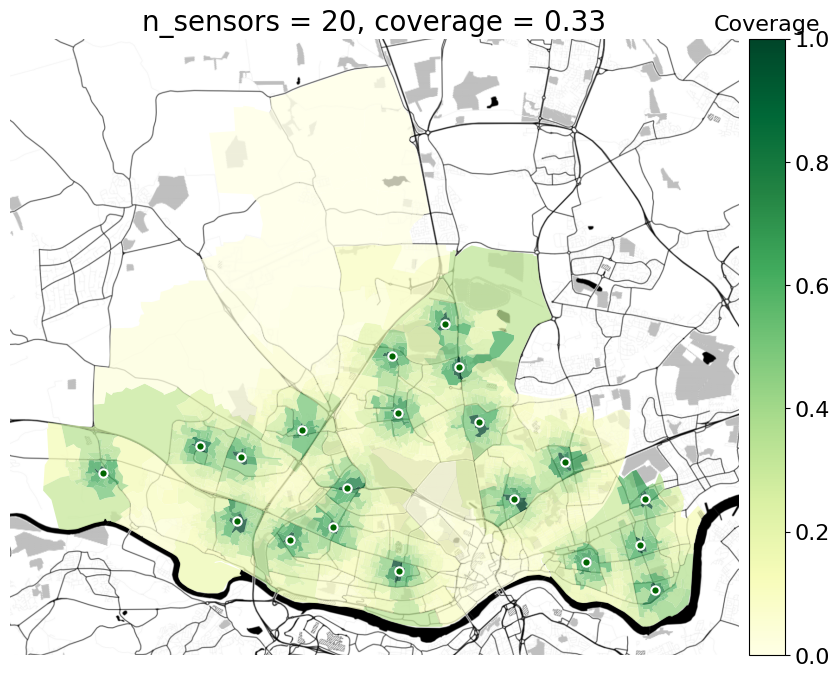

In [11]:
result = greedy.run(objs, n_sensors)
plot_optimisation_result(result)

## Combined Weights

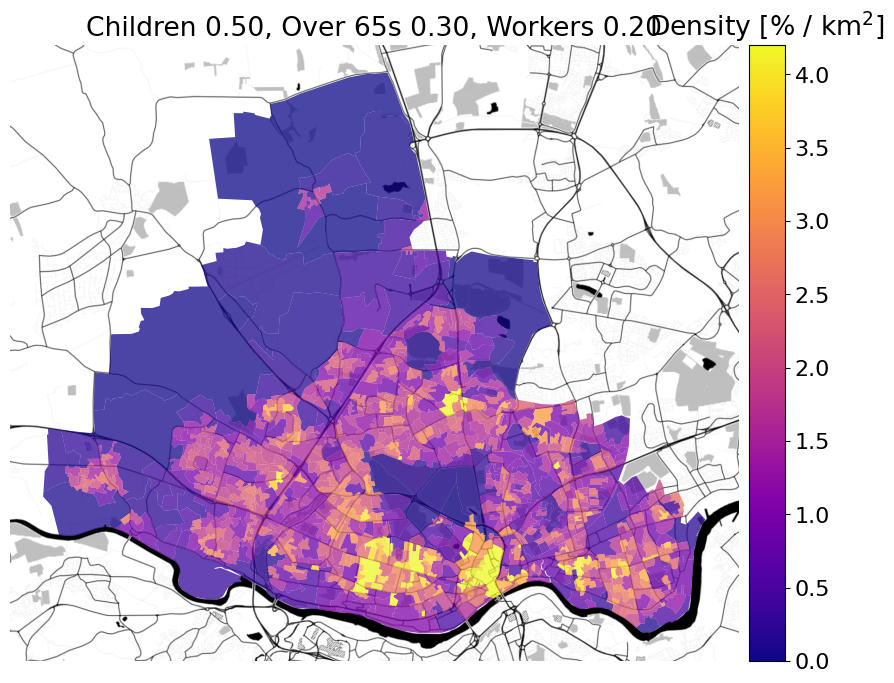

In [14]:
child_weight = 0.5
over65_weight = 0.3
workplace_weight = 0.2

objs = CombinedObjectives(
    la,
    [
        Column(child.name, "total", child_weight),
        Column(over65.name, "total", over65_weight),
        Column(work.name, "workers", workplace_weight),
    ],
    cov,
)

plot_oa_weights(
    objs,
    title=(
        f"Children {child_weight:.2f}, "
        f"Over 65s {over65_weight:.2f}, "
        f"Workers {workplace_weight:.2f}"
    ),
    vmin=vmin,
    vmax=vmax,
    density=density,
)

Placing sensor 1 out of 20 ... coverage = 0.04
Placing sensor 2 out of 20 ... coverage = 0.08
Placing sensor 3 out of 20 ... coverage = 0.10
Placing sensor 4 out of 20 ... coverage = 0.13
Placing sensor 5 out of 20 ... coverage = 0.15
Placing sensor 6 out of 20 ... coverage = 0.17
Placing sensor 7 out of 20 ... coverage = 0.19
Placing sensor 8 out of 20 ... coverage = 0.20
Placing sensor 9 out of 20 ... coverage = 0.22
Placing sensor 10 out of 20 ... coverage = 0.23
Placing sensor 11 out of 20 ... coverage = 0.24
Placing sensor 12 out of 20 ... coverage = 0.26
Placing sensor 13 out of 20 ... coverage = 0.27
Placing sensor 14 out of 20 ... coverage = 0.28
Placing sensor 15 out of 20 ... coverage = 0.29
Placing sensor 16 out of 20 ... coverage = 0.30
Placing sensor 17 out of 20 ... coverage = 0.31
Placing sensor 18 out of 20 ... coverage = 0.32
Placing sensor 19 out of 20 ... coverage = 0.33
Placing sensor 20 out of 20 ... coverage = 0.34


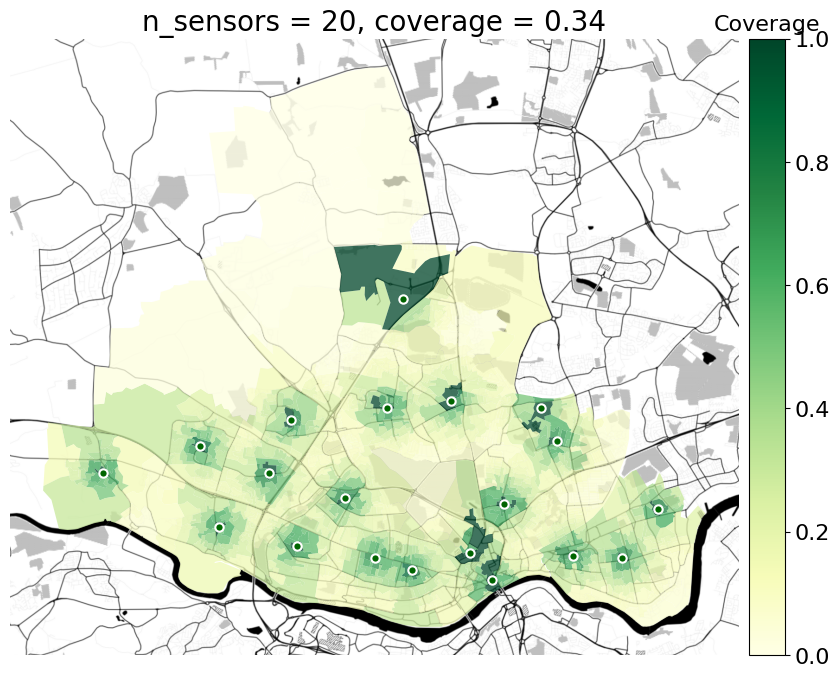

In [15]:
result = greedy.run(objs, n_sensors)
plot_optimisation_result(result)